# Music Genre Classification - Exploratory Data Analysis (Proposed dataset)

### Import necessary libraries

In [2]:
import string
import os
import math

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [4]:
from wordcloud import WordCloud
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer

In [5]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [6]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [7]:
# Parameters and definitions
RANDOM_SEED = 0
VAL_SET_SIZE = 0.2

In [8]:
np.random.seed(RANDOM_SEED)
sns.set(style="darkgrid")

### File Paths

In [9]:
DATASET = "../data/200000_clean.csv"
FIGURES_DIR = "../figures/"

### Helper Methods

In [10]:
def load_data():
    """Loads the training and testing sets into the memory.
    """
    return pd.read_csv(DATASET)

### Data Wrangling

In [11]:
df = load_data()

### Exploratory Data Analysis

In [12]:
# Number of records
print("Len. of data set: {}".format(len(df)))

Len. of data set: 174358


In [13]:
# Summary Statistics
df.info() # Outcome: no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174358 entries, 0 to 174357
Data columns (total 16 columns):
artist     174358 non-null object
title      174358 non-null object
year       174358 non-null object
genre      174358 non-null object
lyrics     174352 non-null object
len        174358 non-null int64
parts      174358 non-null float64
contr      163817 non-null float64
slang      163817 non-null float64
punct      174358 non-null float64
symbols    174358 non-null float64
digits     174358 non-null float64
accents    174358 non-null float64
custom     174358 non-null float64
lang       174358 non-null object
stop       174358 non-null float64
dtypes: float64(9), int64(1), object(6)
memory usage: 21.3+ MB


In [14]:
# Summary Statistics (2)
df.describe()

,len,parts,contr,slang,punct,symbols,digits,accents,custom,stop
count,174358.000000,174358.000000,163817.000000,163817.000000,174358.000000,174358.000000,174358.000000,174358.000000,174358.000000,174358.000000
mean,1516.196641,3.519661,17.763871,4.182356,20.926628,11.848415,0.920875,0.083988,55.024616,119.564098
std,923.755532,5.083295,15.314955,7.279628,27.345962,22.139360,5.083544,0.277371,27.171024,81.926708
min,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,875.000000,0.000000,6.000000,0.000000,4.000000,1.000000,0.000000,0.000000,36.000000,62.000000
50%,1266.000000,2.000000,14.000000,1.000000,11.000000,4.000000,0.000000,0.000000,50.000000,103.000000
75%,1887.000000,7.000000,25.000000,5.000000,27.000000,14.000000,0.000000,0.000000,69.000000,158.000000
max,5000.000000,402.000000,281.000000,171.000000,528.000000,2849.000000,333.000000,1.000000,752.000000,675.000000


In [15]:
df.head()

,artist,title,year,genre,lyrics,len,parts,contr,slang,punct,symbols,digits,accents,custom,lang,stop
0,Jason Mraz,I'm Yours,2008-05-12,pop,well done done bet i felt i tri chill hot i me...,1756,8.0,36.0,1.0,32.0,4.0,0.0,0.0,60.0,en,189.0
1,Mario,Let Me Love You,2004-09-21,pop,mmmm mmmmm yeah mmmmm yeah yeah yeah mmmm yeah...,2589,9.0,31.0,3.0,48.0,29.0,1.0,0.0,90.0,en,228.0
2,Panic! At The Disco,I Write Sins Not Tragedies,2005-09-27,pop,oh well imagin as i pace pew church corridor a...,1761,7.0,19.0,0.0,35.0,23.0,0.0,0.0,61.0,en,134.0
3,Shakira,Hips Don't Lie,2005-11-28,pop,ladi tonight no fight fight we got refuge no f...,3641,18.0,37.0,5.0,78.0,73.0,0.0,1.0,120.0,en,215.0
4,Jonas Brothers,Burnin' Up,2008-08-12,pop,i hot cold you go around like know who i got t...,1780,10.0,37.0,7.0,30.0,45.0,0.0,0.0,67.0,en,138.0


In [16]:
# Number of null entries in both datasets
print("Number of null entries in data set {}".format(df.isnull().sum()))

Number of null entries in data set artist         0
title          0
year           0
genre          0
lyrics         6
len            0
parts          0
contr      10541
slang      10541
punct          0
symbols        0
digits         0
accents        0
custom         0
lang           0
stop           0
dtype: int64


In [17]:
# Different genres
print("Different genres in data set: {}".format(", ".join(df["genre"].unique())))

Different genres in data set: pop, rap, rock, metal, country, jazz, indie, folk, electronic


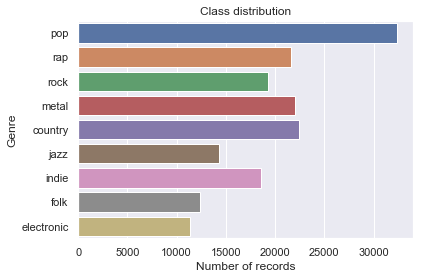

In [18]:
# Visualize different classes for data set
cntplot = sns.countplot(y="genre", data=df)
cntplot.set_title("Class distribution")
cntplot.set_xlabel("Number of records")
cntplot.set_ylabel("Genre")
cntplot.get_figure().savefig(FIGURES_DIR+"5_class_dstr.pdf", bbox_inches="tight")

In [19]:
# Distribution in numbers
df['genre'].value_counts()

pop           32363
country       22428
metal         22019
rap           21571
rock          19286
indie         18546
jazz          14354
folk          12411
electronic    11380
Name: genre, dtype: int64

In [20]:
# In percentages
df['genre'].value_counts(normalize=True)

pop           0.185612
country       0.128632
metal         0.126286
rap           0.123717
rock          0.110612
indie         0.106367
jazz          0.082325
folk          0.071181
electronic    0.065268
Name: genre, dtype: float64

In [21]:
print("Number of unique artists on dataset: {}".format(len(set(df["artist"].values))))

Number of unique artists on dataset: 14569


In [22]:
print("Number of unique songs on dataset: {}".format(len(set(df["title"].values))))

Number of unique songs on dataset: 134862


In [23]:
df["year"] = pd.to_datetime(df["year"],infer_datetime_format=True)

In [24]:
df['year'] = pd.DatetimeIndex(df['year']).year

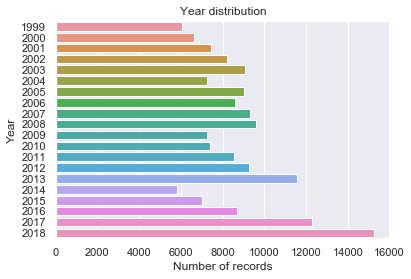

In [26]:
# Visualize different year ranges for data set
cntplot = sns.countplot(y="year", data=df)
cntplot.set_title("Year distribution")
cntplot.set_xlabel("Number of records")
cntplot.set_ylabel("Year")
cntplot.get_figure().savefig(FIGURES_DIR+"6_year_dstr.pdf", bbox_inches="tight")

In [27]:
# Year distribution
df['year'].value_counts(normalize=True)

2018    0.087642
2017    0.070516
2013    0.066277
2008    0.055008
2007    0.053425
2012    0.053287
2003    0.052077
2005    0.051715
2016    0.049771
2006    0.049226
2011    0.049146
2002    0.047196
2001    0.042642
2010    0.042390
2009    0.041684
2004    0.041598
2015    0.040377
2000    0.038042
1999    0.034641
2014    0.033339
Name: year, dtype: float64

In [28]:
sorted(list(set(df["year"])))

[1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

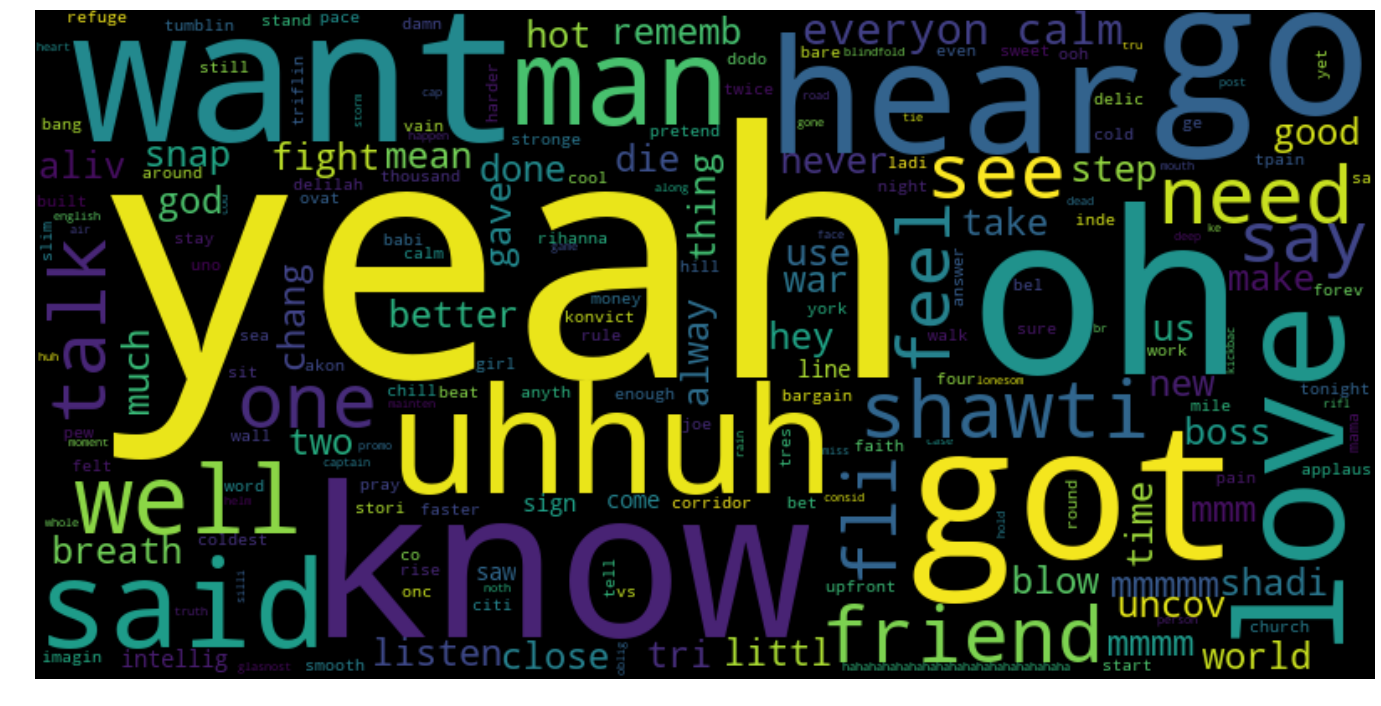

In [29]:
# Word Cloud (most frequently used words)
wc = WordCloud(random_state=0, max_words=200, width=800, height=400).generate(str(df["lyrics"].str.replace('\n','')))
plt.figure(figsize=(24,16))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(FIGURES_DIR+"6_wc.pdf", bbox_inches="tight")
plt.show()

## Load data set with combinatorial features

In [30]:
df.dropna(inplace=True)

In [31]:
df.describe()

,year,len,parts,contr,slang,punct,symbols,digits,accents,custom,stop
count,163817.000000,163817.000000,163817.000000,163817.000000,163817.000000,163817.000000,163817.000000,163817.000000,163817.000000,163817.000000,163817.00000
mean,2009.324881,1558.599425,3.653168,17.763871,4.182356,21.514415,12.329764,0.931735,0.065628,56.117961,125.33057
std,5.830226,924.093490,5.164041,15.314955,7.279628,27.557671,22.106810,4.969647,0.247632,27.035788,80.74333
min,1999.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.00000
25%,2004.000000,911.000000,0.000000,6.000000,0.000000,4.000000,1.000000,0.000000,0.000000,37.000000,69.00000
50%,2009.000000,1301.000000,2.000000,14.000000,1.000000,12.000000,5.000000,0.000000,0.000000,51.000000,108.00000
75%,2015.000000,1940.000000,7.000000,25.000000,5.000000,28.000000,15.000000,0.000000,0.000000,70.000000,163.00000
max,2018.000000,5000.000000,402.000000,281.000000,171.000000,528.000000,2849.000000,333.000000,1.000000,752.000000,675.00000


In [32]:
print("Numnber of tags removed: {}".format(sum(df["parts"])))
print("Number of contractions expanded: {}".format(sum(df["contr"])))
print("Number of slang detected: {}".format(sum(df["slang"])))
print("Number of punctuation removed: {}".format(sum(df["punct"])))
print("Number of symbols removed: {}".format(sum(df["digits"])))
print("Number of accents fixed: {}".format(sum(df["accents"])))
print("Number of custom characters removed: {}".format(sum(df["custom"])))
print("Number of stop words removed: {}".format(sum(df["stop"])))
print("Total number of operations performed: {}".format(sum(df["parts"]) +
                                                       sum(df["contr"]) +
                                                       sum(df["slang"]) +
                                                       sum(df["punct"]) +
                                                       sum(df["digits"]) +
                                                       sum(df["accents"]) +
                                                       sum(df["custom"]) +
                                                       sum(df["stop"])))

Numnber of tags removed: 598451.0
Number of contractions expanded: 2910024.0
Number of slang detected: 685141.0
Number of punctuation removed: 3524427.0
Number of symbols removed: 152634.0
Number of accents fixed: 10751.0
Number of custom characters removed: 9193076.0
Number of stop words removed: 20531278.0
Total number of operations performed: 37605782.0


### Convert categorical column (genre) by performing One Hot Encoding (OHE)

In [33]:
dummies = pd.get_dummies(df['genre'], prefix = 'genre')
df = pd.concat([df, dummies], axis=1)
df.head()

,artist,title,year,genre,lyrics,len,parts,contr,slang,punct,...,stop,genre_country,genre_electronic,genre_folk,genre_indie,genre_jazz,genre_metal,genre_pop,genre_rap,genre_rock
0,Jason Mraz,I'm Yours,2008,pop,well done done bet i felt i tri chill hot i me...,1756,8.0,36.0,1.0,32.0,...,189.0,0,0,0,0,0,0,1,0,0
1,Mario,Let Me Love You,2004,pop,mmmm mmmmm yeah mmmmm yeah yeah yeah mmmm yeah...,2589,9.0,31.0,3.0,48.0,...,228.0,0,0,0,0,0,0,1,0,0
2,Panic! At The Disco,I Write Sins Not Tragedies,2005,pop,oh well imagin as i pace pew church corridor a...,1761,7.0,19.0,0.0,35.0,...,134.0,0,0,0,0,0,0,1,0,0
3,Shakira,Hips Don't Lie,2005,pop,ladi tonight no fight fight we got refuge no f...,3641,18.0,37.0,5.0,78.0,...,215.0,0,0,0,0,0,0,1,0,0
4,Jonas Brothers,Burnin' Up,2008,pop,i hot cold you go around like know who i got t...,1780,10.0,37.0,7.0,30.0,...,138.0,0,0,0,0,0,0,1,0,0


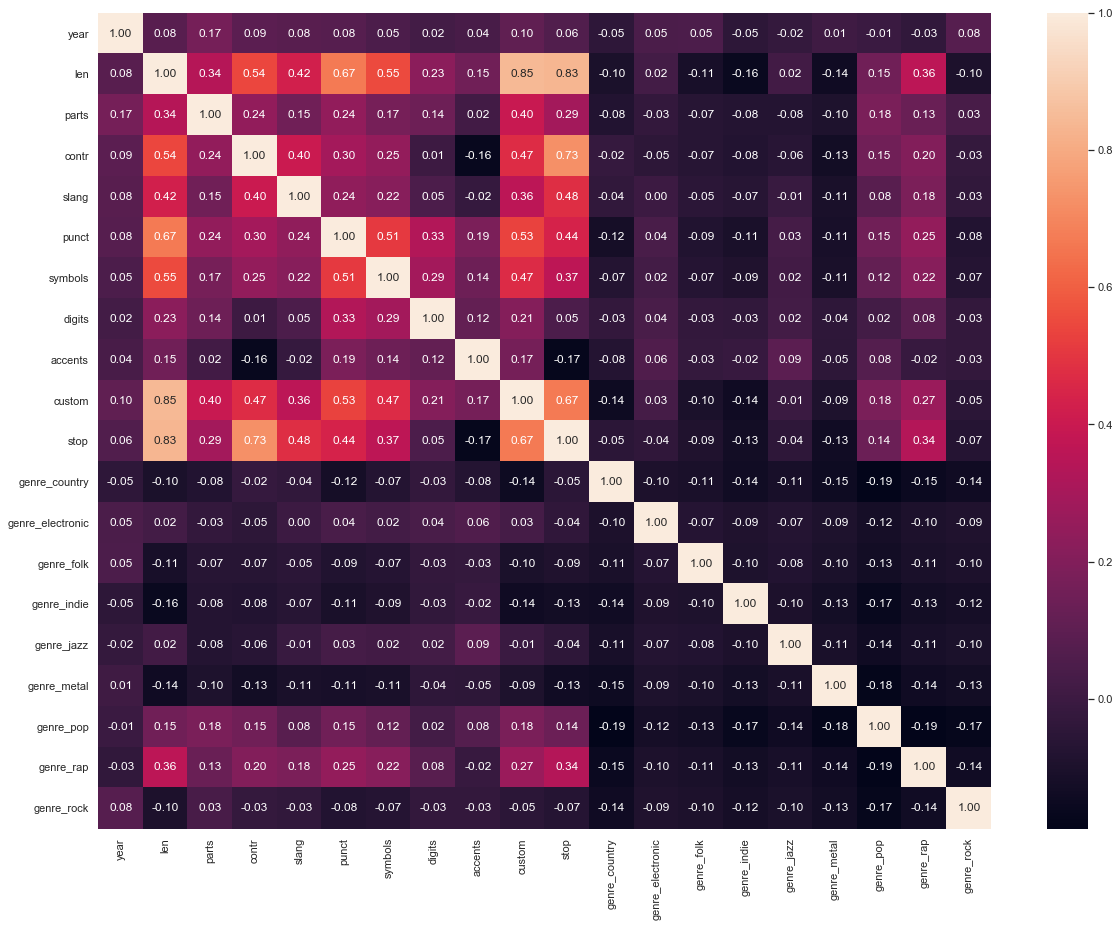

In [34]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(20,15))
ax = plt.subplot(111);
sns.heatmap(corr,
            fmt=".2f",
            annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax);
plt.savefig(FIGURES_DIR+"7_corr_mat.pdf", bbox_inches="tight")